In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mineut
from mineut import plot_tools as pt
from mineut import lattice_tools as lt

## Example 1 -- Muon decay at rest.

We should recover the Michel spectrum and a slightly less energetic nu_mubar component.

In [1]:
from mineut import const

In [5]:
1e-9*const.invGeV2_to_cm2*const.c_LIGHT

1.1673299905984207e-26

In [3]:
from mineut.MuC import MuDecaySimulator

design = {
    "name": r"$\mu^+$DAR",
    "short_name": "mudar",
    "Nmu_per_bunch": 1e12,  # 4.9e9 * 4.5e3 * 1.2e7,
    "duty_factor": 1,
    "bunch_multiplicity": 1,
    "finj": 1,
    "muon_polarization": 0.0,

    }

mudar_numu = MuDecaySimulator(design, nuflavor='numu', n_evals=1e5)
mudar_nue = MuDecaySimulator(design, nuflavor='nue', n_evals=1e5)

In [4]:
mudar_numu.decay_muons()
mudar_nue.decay_muons()

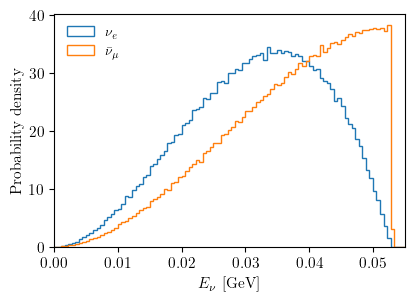

In [5]:
fig, ax = pt.std_fig()
en_bins = np.linspace(0, 0.055, 100)
_=ax.hist(mudar_nue.pnu_restframe['E'], weights=mudar_nue.weights, bins=en_bins, density=True, histtype='step', label=r'$\nu_e$')
_=ax.hist(mudar_numu.pnu_restframe['E'], weights=mudar_numu.weights, bins=en_bins, density=True, histtype='step', label=r'$\bar\nu_\mu$')
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel("Probability density")
ax.legend()
ax.set_xlim(0, 0.055)
fig.savefig('plots/mudar_nu_spectrum.pdf', bbox_inches='tight')


## Example 2 -- muon storage rings

Now let's place muons in storage rings with a given momentum

In [6]:
design = {
    "name": r"$\nu$STORM",
    "short_name": "nustorm",
    "muon_polarization": 0.0,
    }

nufact_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

nufact_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )


In [4]:
nufact_numu.decay_muons()
nufact_nue.decay_muons()

Setting additional z to <scipy.interpolate._interpolate.interp1d object at 0x129571d60>
Setting additional tangent to <function create_lattice_dict_from_vertices.<locals>.<lambda> at 0x119f282c0>
Warning! The following keys were not recognized and will be ignored: dict_keys(['z', 'tangent'])


In [8]:
racetrack_lattice = lt.create_racetrack_lattice(
            straight_length=100e2,
            total_length=300e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=0.1,
            beamsize=1,
        )

sample_size: 937773
pos x range: -3187.897700637538 -1593.341453051312 4.774290103253222
pos y range: -5.027660887530879 -0.00240553369003192 4.655910189521766
pos z range: -6595.068544270729 -0.3774221993393837 6594.900577139646
s_in_turn min/max: 0.011176300211725894 29999.910864976213
u_parameter min/max: 3.725439116086804e-07 0.9999985621202365
mutimes min/max: 3.72937029437864e-13 1.0012672578274773e-06
muon_lifetime min/max: 3.910989761471485e-05 0.0001185442141728484
sample_size: 937540
pos x range: -3187.741936118966 -1591.8943344238382 4.3815233133254825
pos y range: -5.322285875215775 -0.0005760053040306007 4.977482278998477
pos z range: -6594.326748988767 0.6119885049044523 6594.530509885642
s_in_turn min/max: 0.04816066913925754 29999.951963690502
u_parameter min/max: 1.6053580994546124e-06 0.99999993207948
mutimes min/max: 1.6071902763655628e-12 1.00121888632414e-06
muon_lifetime min/max: 4.1252928443071106e-05 0.00011751459217443198


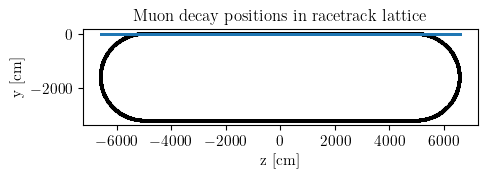

In [36]:
nufact_nue.place_muons_on_lattice(lattice=racetrack_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=racetrack_lattice, direction="clockwise")

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(racetrack_lattice.vertices[0], racetrack_lattice.vertices[1], c='black', marker='+', s=10)
ax.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
fig.gca().set_aspect('equal', adjustable='box')
ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("Muon decay positions in racetrack lattice")
fig.savefig('plots/nufactory_muon_decay_positions.pdf', bbox_inches='tight')

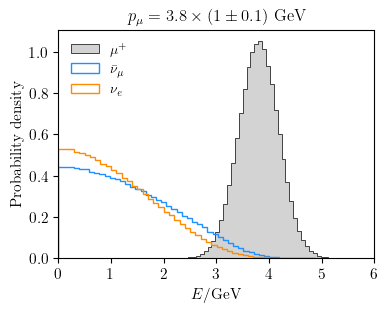

In [10]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 50
ax.hist(nufact_numu.pmu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(nufact_numu.pnu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pnu['E'], weights=nufact_nue.weights, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,6)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/lattice_test.pdf', dpi=300, bbox_inches='tight')

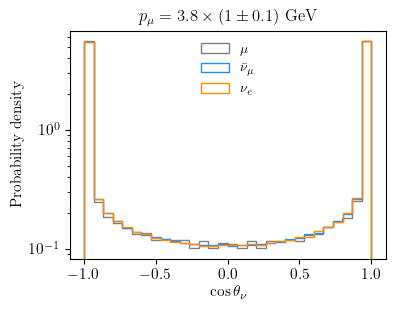

In [11]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 30
ax.hist(nufact_numu.pmu['pz']/nufact_numu.pmu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\mu$',color='grey', histtype='step', density=True)
ax.hist(nufact_numu.pnu['pz']/nufact_numu.pnu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$',color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pnu['pz']/nufact_nue.pnu['E'], weights=nufact_nue.weights, bins=n_bins, label=r'$\nu_e$',color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper center')
# ax.set_xlim(0,6)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\cos{\theta_\nu}$')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/3p8GeV_lattice_angle.pdf', dpi=300, bbox_inches='tight')

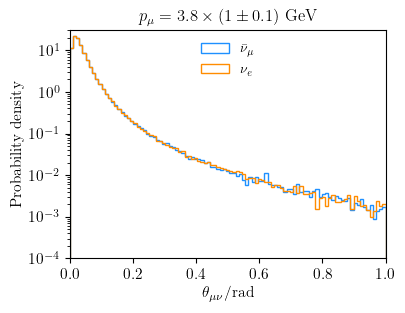

In [12]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
theta_max = 1 # rad
bins = np.linspace(0, theta_max, 100)
ax.hist(nufact_numu.pmu.deltaangle(nufact_numu.pnu), weights=nufact_numu.weights, bins=bins, label=r'$\bar\nu_\mu$',color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pmu.deltaangle(nufact_nue.pnu), weights=nufact_nue.weights, bins=bins, label=r'$\nu_e$',color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper center')
ax.set_ylim(1e-4, 30)
ax.set_xlim(0, theta_max)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\theta_{\mu\nu}$/rad')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/3p8GeV_lattice_opening_angle.pdf', dpi=300, bbox_inches='tight')

In [13]:
enu_edges = np.linspace(0, 5, 40)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2

_, flux_numu = nufact_numu.get_flux_at_generic_location(
        det_location=[0, 0, 100e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue = nufact_nue.get_flux_at_generic_location(
        det_location=[0, 0, 100e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_far = nufact_numu.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_far = nufact_nue.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

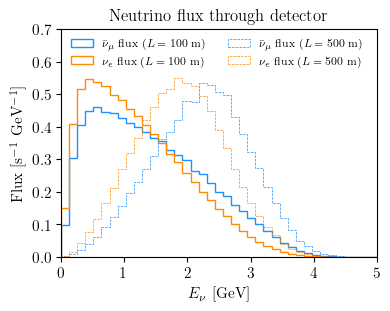

In [14]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=100$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges, weights=flux_nue, label=r'$\nu_e$ flux ($L=100$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.7)
ax.set_xlim(0, 5)
fig.savefig('plots/nufactory_flux.pdf', bbox_inches='tight')

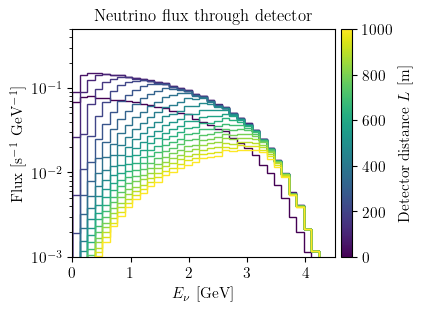

In [15]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_numu = nufact_numu.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/nufactory_flux_numu_w_distance.png', bbox_inches='tight')

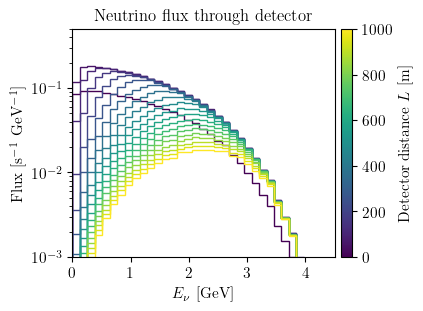

In [16]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_nue = nufact_nue.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)
        line = ax.hist(enu, bins=enu_edges, weights=flux_nue, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/nufactory_flux_nue_w_distance.png', bbox_inches='tight')

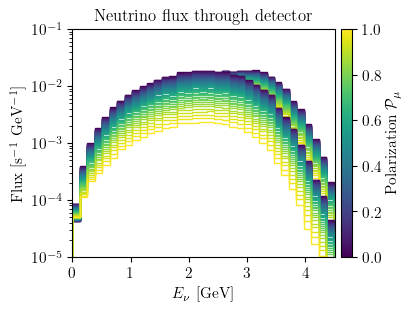

In [17]:
fig, ax = pt.std_fig(figsize=(4,3))
pol_vals = np.linspace(0, 1, 40)
L = 1e3 * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(pol_vals)))
lines = []
for i, pol in enumerate(pol_vals):
        _, flux_numu = nufact_numu.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=pol,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)


for i, pol in enumerate(pol_vals):
        _, flux_numu = nufact_nue.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=pol,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=pol_vals[0], vmax=pol_vals[-1]))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Polarization $\mathcal{P}_\mu$')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.set_ylim(1e-5, 0.1)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/nufactory_flux_numu_w_polarization.png', bbox_inches='tight')

# Simplified parameterized lattices

In [ ]:
elliptical_lattice = lt.create_elliptical_lattice(
    length_minor=10e2,
    length_major=10e2,
    center=(0, 0),
    n_elements=100_000,
    beam_p0=3.8,
    beamdiv=1e-3,
    beamdiv_z=0.1,
    beamsize=1,
    )

nufact_nue.place_muons_on_lattice(lattice=elliptical_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=elliptical_lattice, direction="clockwise")

plt.scatter(elliptical_lattice.vertices[0], elliptical_lattice.vertices[1], c='black', marker='+', s=10)
plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.2)
plt.gca().set_aspect('equal', adjustable='box')

In [19]:
design = {
    "name": r"MuC Acc",
    "short_name": "muc_acc",
    "muon_polarization": 0.0,
    }

PA_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e5,
    )

PA_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e5,
    )

PA_numu.decay_muons()
PA_nue.decay_muons()

Setting additional z to <scipy.interpolate._interpolate.interp1d object at 0x132d51bd0>
Setting additional tangent to <function create_lattice_dict_from_vertices.<locals>.<lambda> at 0x105b1e520>
Warning! The following keys were not recognized and will be ignored: dict_keys(['z', 'tangent'])
sample_size: 937519
pos x range: -4.37672116986254 -0.0010550473610585098 4.677270524843995
pos y range: -4.621941576002259 0.0005094368141949551 5.504546478445865
pos z range: -7999.953660047293 3.221983332441588 7999.9936051701025
s_in_turn min/max: 0.04633995270708624 15999.993605170102
u_parameter min/max: 2.89624704419289e-06 0.9999996003231314
mutimes min/max: 1.7079875615879143e-12 5.357063941135451e-07
muon_lifetime min/max: 5.043990130071868e-06 2.7080800733087263e-05
sample_size: 937684
pos x range: -4.978490623283506 -0.0003542280651135936 4.764644783650861
pos y range: -4.697521655185 -0.000639953203798554 5.18877986434275
pos z range: -7999.94747216248 -3.9269443339258348 7999.99301190

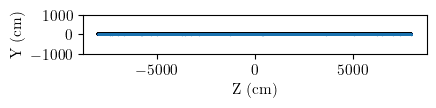

In [20]:
straight_lattice = lt.create_straight_lattice(
            total_length=100e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1,
            Nmu_per_bunch=2e12,
        )

PA_numu.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")
PA_nue.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")

plt.scatter(straight_lattice.vertices[0], straight_lattice.vertices[1], c='black', marker='+', s=10)
plt.scatter(PA_numu.pos['z'], PA_numu.pos['y'], marker='.', s=0.1)
plt.ylim(-1000, 1000)
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')
plt.gca().set_aspect('equal', adjustable='box')

In [24]:
PA_numu.weights[:,0]

array([7.31845474e-07, 7.41151682e-07, 7.87637854e-07, ...,
       7.96728054e-06, 7.99160514e-06, 7.98343219e-06])

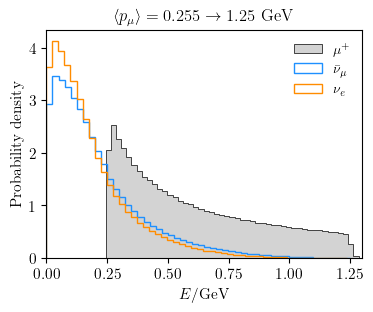

In [5]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 50
ax.hist(PA_numu.pmu['E'], weights=PA_numu.weights[:,0], bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(PA_numu.pnu['E'], weights=PA_numu.weights[:,0], lw=1.8, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(PA_nue.pnu['E'], weights=PA_nue.weights[:,0], lw=1.8, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper right')
ax.set_xlim(0,1.3)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'$\langle p_\mu \rangle =0.255 \to 1.25$~GeV',fontsize=fsize)

fig.savefig('plots/PA_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Neutrino energy spectrum\nTime: 0.0 - 17.6 ns')

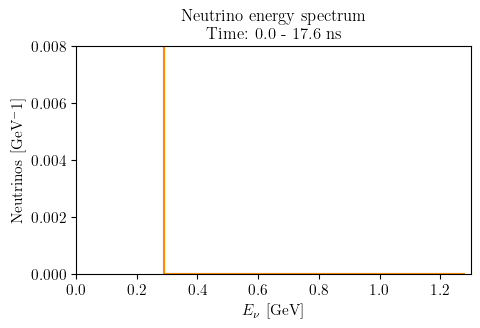

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# import pt  # assuming pt.std_fig is your custom figure utility

# Bin times and energies
time_bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 20)
dt = time_bins[1] - time_bins[0]
enu_edges = np.linspace(0, 1.3, 30)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2



# Set up figure
fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
line0, = ax.step([], [], color='grey')
line1, = ax.step([], [], color='dodgerblue')
line2, = ax.step([], [], color='darkorange')
ax.set_xlim(enu_edges[0], enu_edges[-1])
ax.set_ylim(0, 0.008)
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel('Neutrinos [GeV$^-1$]')
ax.set_title('Neutrino energy spectrum vs time')


line0.set_data([], [])
line1.set_data([], [])
line2.set_data([], [])


# Get the time window
i=0
t_min, t_max = time_bins[i], time_bins[i + 1]

# Create mask for valid events in this time bin
mask_numu = (PA_numu.mutimes >= t_min) & (PA_numu.mutimes < t_max)
mask_nue = (PA_nue.mutimes >= t_min) & (PA_nue.mutimes < t_max)

flux_numu, _ = np.histogram(
            PA_numu.pnu['E'][mask_numu],
            weights=PA_numu.weights[mask_numu,0],
            density=True,
            bins=enu_edges)

flux_nue, _ = np.histogram(
            PA_nue.pnu['E'][mask_nue],
            weights=PA_nue.weights[mask_nue,0],
            density=True,
            bins=enu_edges)

# hist_mu, _ = np.histogram(PA_numu.pmu['E'][mask_numu], bins=enu_edges, weights=PA_numu.weights[mask_numu,0], density=True)
# line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.005)
line1.set_data(enu, flux_numu)
line2.set_data(enu, flux_nue)
ax.set_title(f'Neutrino energy spectrum\nTime: {t_min*1e9:.1f} - {t_max*1e9:.1f} ns')


/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_28736/300026796.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


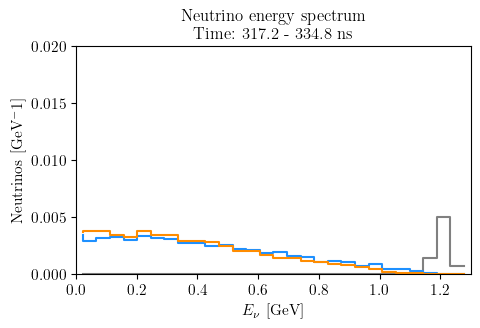

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# import pt  # assuming pt.std_fig is your custom figure utility

# Bin times and energies
time_bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 20)
dt = time_bins[1] - time_bins[0]
enu_edges = np.linspace(0, 1.3, 30)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2



# Set up figure
fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
line0, = ax.step([], [], color='grey')
line1, = ax.step([], [], color='dodgerblue')
line2, = ax.step([], [], color='darkorange')
ax.set_xlim(enu_edges[0], enu_edges[-1])
ax.set_ylim(0, 0.02)
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel('Neutrinos [GeV$^-1$]')
ax.set_title('Neutrino energy spectrum vs time')

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return line0, line1, line2

def animate(i):
    # Get the time window
    t_min, t_max = time_bins[i], time_bins[i + 1]
    
    # Create mask for valid events in this time bin
    mask_numu = (PA_numu.mutimes >= t_min) & (PA_numu.mutimes < t_max)
    mask_nue = (PA_nue.mutimes >= t_min) & (PA_nue.mutimes < t_max)

    flux_numu, _ = np.histogram(
                PA_numu.pnu['E'][mask_numu],
                weights=PA_numu.weights[mask_numu,0],
                density=False,
                bins=enu_edges)

    flux_nue, _ = np.histogram(
                PA_nue.pnu['E'][mask_nue],
                weights=PA_nue.weights[mask_nue,0],
                density=False,
                bins=enu_edges)
    
    hist_mu, _ = np.histogram(PA_numu.pmu['E'][mask_numu], bins=enu_edges, weights=PA_numu.weights[mask_numu,0], density=True)
    line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.005)
    line1.set_data(enu, flux_numu)
    line2.set_data(enu, flux_nue)
    ax.set_title(f'Neutrino energy spectrum\nTime: {t_min*1e9:.1f} - {t_max*1e9:.1f} ns')
    return line0, line1, line2,

ani = FuncAnimation(fig, animate, frames=len(time_bins)-1, init_func=init, blit=True, interval=200)
fig.tight_layout()
ani.save('plots/numu_energy_vs_time_allnus.gif', writer='pillow', fps=10)
plt.show()

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_28736/2737022243.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


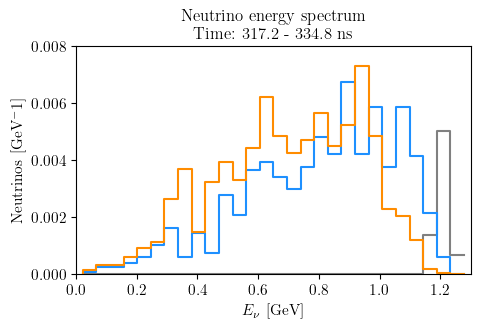

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# import pt  # assuming pt.std_fig is your custom figure utility

# Bin times and energies
time_bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 20)
dt = time_bins[1] - time_bins[0]
enu_edges = np.linspace(0, 1.3, 30)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2



# Set up figure
fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
line0, = ax.step([], [], color='grey')
line1, = ax.step([], [], color='dodgerblue')
line2, = ax.step([], [], color='darkorange')
ax.set_xlim(enu_edges[0], enu_edges[-1])
ax.set_ylim(0, 0.008)
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel('Neutrinos [GeV$^-1$]')
ax.set_title('Neutrino energy spectrum vs time')

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return line0, line1, line2

def animate(i):
    # Get the time window
    t_min, t_max = time_bins[i], time_bins[i + 1]
    
    # Create mask for valid events in this time bin
    mask_numu = (PA_numu.mutimes >= t_min) & (PA_numu.mutimes < t_max)
    mask_nue = (PA_nue.mutimes >= t_min) & (PA_nue.mutimes < t_max)

    _, flux_numu = PA_numu.get_flux_at_generic_location(
                det_location=[0, 0, 500e2],
                det_radius=10e2,
                ebins=enu_edges,
                acceptance=False,
                per_area=False,
                new_polarization=None,
                normalization=1,
                mask=mask_numu)

    _, flux_nue = PA_nue.get_flux_at_generic_location(
                det_location=[0, 0, 500e2],
                det_radius=10e2,
                ebins=enu_edges,
                acceptance=False,
                per_area=False,
                new_polarization=None,
                normalization=1,
                mask=mask_nue)
    hist_mu, _ = np.histogram(PA_numu.pmu['E'][mask_numu], bins=enu_edges, weights=PA_numu.weights[mask_numu,0], density=True)
    line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.005)
    line1.set_data(enu, flux_numu)
    line2.set_data(enu, flux_nue)
    ax.set_title(f'Neutrino energy spectrum\nTime: {t_min*1e9:.1f} - {t_max*1e9:.1f} ns')
    return line0, line1, line2,

ani = FuncAnimation(fig, animate, frames=len(time_bins)-1, init_func=init, blit=True, interval=200)
fig.tight_layout()
ani.save('plots/numu_energy_vs_time.gif', writer='pillow', fps=10)
plt.show()

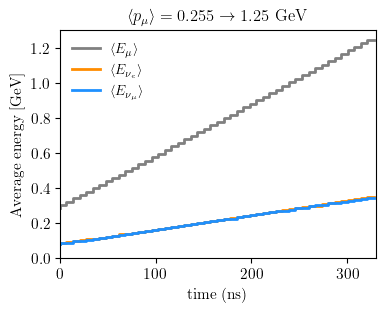

In [41]:
# Bin mutimes and compute average neutrino energy in each bin
bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 50)
digitized = np.digitize(PA_numu.mutimes, bins)
avg_mu_E = [PA_numu.pmu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
avg_numu_E = [np.mean(PA_numu.pnu['E'][digitized == i]) if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
bins = np.linspace(PA_nue.mutimes.min(), PA_nue.mutimes.max(), 50)
digitized = np.digitize(PA_nue.mutimes, bins)
avg_nue_E = [np.mean(PA_nue.pnu['E'][digitized == i]) if np.any(digitized == i) else np.nan for i in range(1, len(bins))]

fig, ax = pt.std_fig(figsize=(4,3))
ax.step(bins[:-1]*1e9, avg_mu_E, lw=2, linestyle='-', color='grey', label=r'$\langle E_{\mu} \rangle$')
ax.step(bins[:-1]*1e9, avg_nue_E, lw=2, linestyle='-', color='darkorange', label=r'$\langle E_{\nu_e} \rangle$')
ax.step(bins[:-1]*1e9, avg_numu_E, lw=2, linestyle='-', color='dodgerblue', label=r'$\langle E_{\nu_\mu} \rangle$')
ax.set_xlabel('time (ns)')
ax.set_ylabel(r'Average energy [GeV]')
ax.set_title(r'$\langle p_\mu \rangle =0.255 \to 1.25$~GeV', fontsize=fsize)
ax.legend(frameon=False, loc='upper left')
ax.set_ylim(0,1.3)
ax.set_xlim(0,330)
fig.savefig('plots/PA_avg_nuE_vs_mutimes.pdf', dpi=300, bbox_inches='tight')


In [52]:
design = {
    "name": r"RLA1",
    "short_name": "rla1",
    "muon_polarization": 0.0,
    }

RLA1_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

RLA1_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

RLA1_numu.decay_muons()
RLA1_nue.decay_muons()


Setting additional z to <scipy.interpolate._interpolate.interp1d object at 0x133ee1540>
Setting additional tangent to <function create_lattice_dict_from_vertices.<locals>.<lambda> at 0x133e9bc40>
Warning! The following keys were not recognized and will be ignored: dict_keys(['z', 'tangent'])
sample_size: 937680
pos x range: -2744.8680909146215 -0.602260054263416 2744.8638186036746
pos y range: -0.04796962911511358 -1.0966862531114614e-05 0.04575851255598435
pos z range: -13088.99201829821 -442.01414120928473 12079.234818424116
s_in_turn min/max: 0.10425818009449404 120045.33703278728
u_parameter min/max: 8.684897512267753e-07 0.9999996623866425
mutimes min/max: 3.490038171705115e-12 4.005174345730164e-06
muon_lifetime min/max: 2.5438279610671313e-05 0.00010752875620390442
sample_size: 937395
pos x range: -2744.870424318371 -0.00023681707872080684 2744.8670637313235
pos y range: -0.05254535839544955 -4.283310552600657e-06 0.04828125713113894
pos z range: -13088.991146841627 -461.9835281

Text(0.5, 1.0, 'RLA 1')

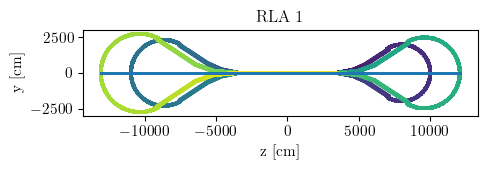

In [53]:
RLA1_lattice = lt.create_RLA_lattice(
            straight_length=70e2,
            n_elements=100_000,
            p0_injection=1.25,
            dp_dx_LA=0.75/70e2,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1e-2,
            Nmu_per_bunch=2e12,
        )
RLA1_nue.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")
RLA1_numu.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")

max_index = len(RLA1_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(RLA1_lattice.vertices[0], RLA1_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(RLA1_numu.pos['z'], RLA1_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("RLA 1")

Text(0.5, 1.0, 'RLA 1')

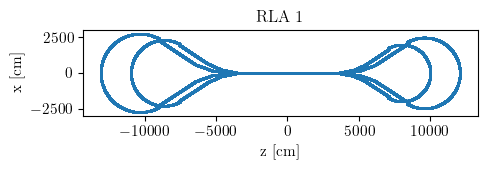

In [6]:
fig, ax = pt.std_fig(figsize=(5, 2))

ax.scatter(RLA1_numu.pos['z'], RLA1_numu.pos['x'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("x [cm]")
ax.set_title("RLA 1")

In [21]:
print(np.max(RLA1_lattice.vertices[0]))
print(np.min(RLA1_lattice.vertices[0]))

12079.21029579302
-13088.960860165247


In [8]:
print(sum(RLA1_numu.weights))
print(sum(RLA1_nue.weights))

[6.74592308e+10]
[6.74740903e+10]


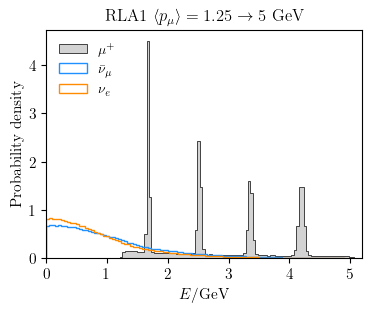

In [8]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 100
ax.hist(RLA1_numu.pmu['E'], weights=RLA1_numu.weights[:,0], bins=n_bins,  label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(RLA1_numu.pnu['E'], weights=RLA1_numu.weights[:,0], bins=n_bins, lw=1.5, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA1_nue.pnu['E'], weights=RLA1_nue.weights[:,0], bins=n_bins, lw=1.5, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,5.2)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA1 $\langle p_\mu \rangle = 1.25 \to 5$~GeV',fontsize=fsize)

fig.savefig('plots/RLA1_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

In [51]:
design = {
    "name": r"RLA2",
    "short_name": "rla2",
    "muon_polarization": 0.0,
    }

RLA2_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

RLA2_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

RLA2_numu.decay_muons()
RLA2_nue.decay_muons()


Setting additional z to <scipy.interpolate._interpolate.interp1d object at 0x13405cb40>
Setting additional tangent to <function create_lattice_dict_from_vertices.<locals>.<lambda> at 0x133f4dbc0>
Warning! The following keys were not recognized and will be ignored: dict_keys(['z', 'tangent'])
sample_size: 937785
pos x range: -32506.841498279264 2.7276341731459377 32506.827075716577
pos y range: -0.045625222976862716 -1.492648760262994e-05 0.05216762077615554
pos z range: -155010.72425969093 -6014.20445070587 143052.38977078168
s_in_turn min/max: 2.829677803436646 1463129.8539264626
u_parameter min/max: 1.9339889867353577e-06 0.9999997244282888
mutimes min/max: 9.440897552621486e-11 4.880482747347272e-05
muon_lifetime min/max: 0.0001013789311037861 0.0013455539809325145
sample_size: 937654
pos x range: -32506.83428976686 -3.597029776635828 32506.82996315266
pos y range: -0.049167791432016494 -5.683484473318672e-06 0.047666462841715516
pos z range: -155010.71722146327 -5976.897815064488 1

Text(0.5, 1.0, 'RLA 2')

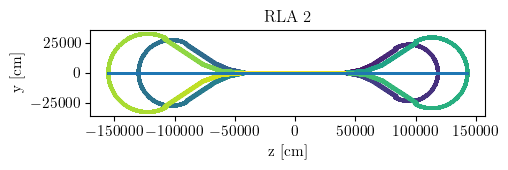

In [55]:
RLA2_lattice = lt.create_RLA_lattice(
            straight_length=829e2,
            n_elements=100_000,
            p0_injection=5.0,
            dp_dx_LA=11.6/829e2,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1e-2,
            half=False,
            Nmu_per_bunch=2e12,
        )
RLA2_nue.place_muons_on_lattice(lattice=RLA2_lattice, direction="clockwise")
RLA2_numu.place_muons_on_lattice(lattice=RLA2_lattice, direction="clockwise")

max_index = len(RLA2_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(RLA2_lattice.vertices[0], RLA2_lattice.vertices[1], c=np.linspace(0, 1, max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(RLA2_numu.pos['z'], RLA2_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("RLA 2")

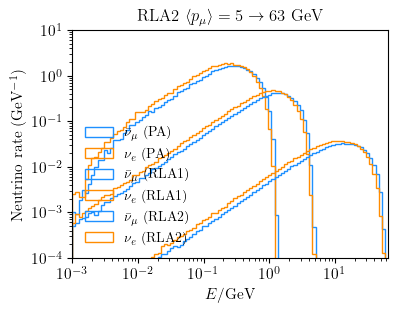

In [56]:
# Use geometrically spaced energy bins
energy_min = 1e-3  # avoid zero for logspace
energy_max = 65
n_bins = 100
energy_bins = np.geomspace(energy_min, energy_max, n_bins + 1)

fig, ax = pt.std_fig(figsize=(4,3))
fsize = 12

ax.hist(PA_numu.pnu['E'], weights=PA_numu.weights[:,0]*PA_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (PA)', color='dodgerblue', histtype='step', density=True)
ax.hist(PA_nue.pnu['E'], weights=PA_nue.weights[:,0]*PA_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (PA)', color='darkorange', histtype='step', density=True)

ax.hist(RLA1_numu.pnu['E'], weights=RLA1_numu.weights[:,0]*RLA1_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (RLA1)', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA1_nue.pnu['E'], weights=RLA1_nue.weights[:,0]*RLA1_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (RLA1)', color='darkorange', histtype='step', density=True)

ax.hist(RLA2_numu.pnu['E'], weights=RLA2_numu.weights[:,0]*RLA2_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (RLA2)', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA2_nue.pnu['E'], weights=RLA2_nue.weights[:,0]*RLA2_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (RLA2)', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False, loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(energy_min, energy_max)
ax.set_ylim(1e-4, 1e1)
ax.set_ylabel(r'Neutrino rate (GeV$^{-1}$)')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA2 $\langle p_\mu \rangle = 5 \to 63$~GeV', fontsize=fsize)

fig.savefig('plots/RLA2_energy_spectrum_logE.pdf', dpi=300, bbox_inches='tight')

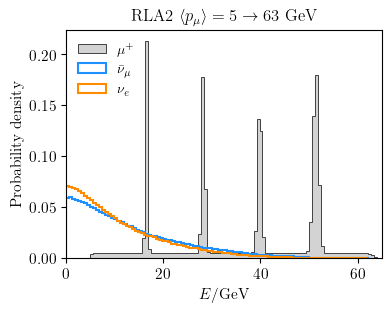

In [57]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 100
ax.hist(RLA2_numu.pmu['E'], weights=RLA2_numu.weights[:,0], bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(RLA2_numu.pnu['E'], weights=RLA2_numu.weights[:,0], lw=1.5, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA2_nue.pnu['E'], weights=RLA2_nue.weights[:,0], lw=1.5, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,65)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA2 $\langle p_\mu \rangle = 5 \to 63$~GeV',fontsize=fsize)

fig.savefig('plots/RLA2_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_28736/24365821.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux through detector.
No flux thro

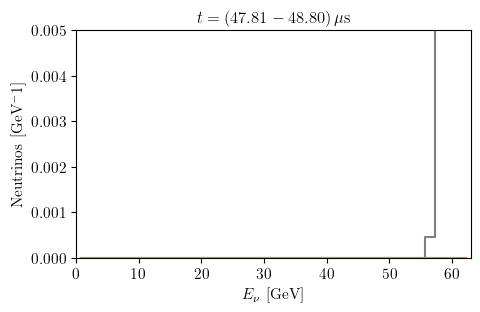

In [66]:
def make_animation_over_time(MuC_acc_numu, MuC_acc_nue, name='test',Emax=6):

    # Bin times and energies
    time_bins = np.linspace(MuC_acc_numu.mutimes.min(), MuC_acc_numu.mutimes.max(), 50)
    dt = time_bins[1] - time_bins[0]
    enu_edges = np.linspace(0, Emax, 40)
    enu = (enu_edges[1:] + enu_edges[:-1]) / 2

    # Set up figure
    fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
    line0, = ax.step([], [], color='grey')
    line1, = ax.step([], [], color='dodgerblue')
    line2, = ax.step([], [], color='darkorange')
    ax.set_xlim(enu_edges[0], enu_edges[-1])
    ax.set_ylim(0, 0.005)
    ax.set_xlabel(r'$E_{\nu}$ [GeV]')
    ax.set_ylabel('Neutrinos [GeV$^-1$]')
    ax.set_title('Neutrino energy spectrum vs time')

    def init():
        line0.set_data([], [])
        line1.set_data([], [])
        line2.set_data([], [])
        return line0, line1, line2

    def animate(i):
        # Get the time window
        t_min, t_max = time_bins[i], time_bins[i + 1]
        
        # Create mask for valid events in this time bin
        mask_numu = (MuC_acc_numu.mutimes >= t_min) & (MuC_acc_numu.mutimes < t_max)
        mask_nue = (MuC_acc_nue.mutimes >= t_min) & (MuC_acc_nue.mutimes < t_max)

        _, flux_numu = MuC_acc_numu.get_flux_at_generic_location(
                    det_location=[0, 0, 5e5],
                    det_radius=1e5,
                    ebins=enu_edges,
                    acceptance=False,
                    per_area=False,
                    new_polarization=None,
                    normalization=1,
                    mask=mask_numu)
        
        _, flux_nue = MuC_acc_nue.get_flux_at_generic_location(
                    det_location=[0, 0, 5e5],
                    det_radius=1e5,
                    ebins=enu_edges,
                    acceptance=False,
                    per_area=False,
                    new_polarization=None,
                    normalization=1,
                    mask=mask_nue)
        
        hist_mu, _ = np.histogram(MuC_acc_numu.pmu['E'][mask_numu], bins=enu_edges, weights=MuC_acc_numu.weights[mask_numu,0], density=False)
        line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.02)
        line1.set_data(enu, flux_numu)
        line2.set_data(enu, flux_nue)
        ax.set_title(rf'$t = ({t_min*1e6:.2f} - {t_max*1e6:.2f}) \,\mu$s')
        return line0, line1, line2,

    ani = FuncAnimation(fig, animate, frames=len(time_bins)-1, init_func=init, blit=True, interval=200)
    fig.tight_layout()
    ani.save(f'plots/numu_energy_vs_time_{name}.gif', writer='pillow', fps=20)
    plt.show()
# make_animation_over_time(RLA1_numu, RLA1_nue, name='RLA1', Emax=5.0)
make_animation_over_time(RLA2_numu, RLA2_nue, name='RLA2', Emax=63)

(<Figure size 400x300 with 1 Axes>,
 <Axes: title={'center': '$\\langle p_\\mu \\rangle =5 \\to 63$~GeV'}, xlabel='time (ns)', ylabel='Average neutrino energy [GeV]'>)

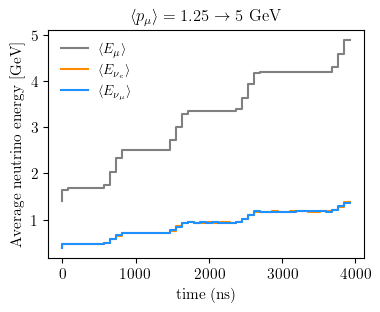

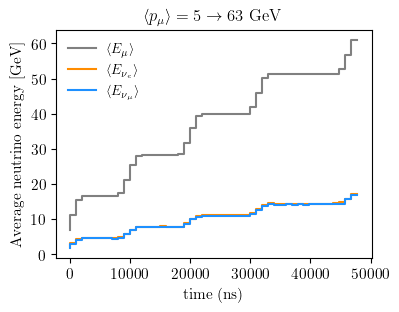

In [28]:
def plot_avgE_vs_time(MuC_acc_numu, MuC_acc_nue,label=None):
    # Bin mutimes and compute average neutrino energy in each bin
    bins = np.linspace(MuC_acc_numu.mutimes.min(), MuC_acc_numu.mutimes.max(), 50)
    digitized = np.digitize(MuC_acc_numu.mutimes, bins)
    avg_mu_E = [MuC_acc_numu.pmu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
    avg_numu_E = [MuC_acc_numu.pnu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
    bins = np.linspace(MuC_acc_nue.mutimes.min(), MuC_acc_nue.mutimes.max(), 50)
    digitized = np.digitize(MuC_acc_nue.mutimes, bins)
    avg_nue_E = [MuC_acc_nue.pnu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]

    fig, ax = pt.std_fig(figsize=(4,3))
    ax.step(1e6*bins[:-1], avg_mu_E, linestyle='-', color='grey', label=r'$\langle E_{\mu} \rangle$')
    ax.step(1e6*bins[:-1], avg_nue_E, linestyle='-', color='darkorange', label=r'$\langle E_{\nu_e} \rangle$')
    ax.step(1e6*bins[:-1], avg_numu_E, linestyle='-', color='dodgerblue', label=r'$\langle E_{\nu_\mu} \rangle$')
    ax.set_xlabel(r'time ($\mu$s)')
    ax.set_ylabel(r'Average neutrino energy [GeV]')
    ax.legend(frameon=False, loc='upper left')

    if label == 'PA':
        ax.set_title(r'$\langle p_\mu \rangle =0.225 \to 1.25$~GeV')
    elif label == 'RLA1':
        ax.set_title(r'$\langle p_\mu \rangle =1.25 \to 5$~GeV')
    elif label == 'RLA2':
        ax.set_title(r'$\langle p_\mu \rangle =5 \to 63$~GeV')

    fig.savefig(f"plots/{label}_avg_nuE_vs_mutimes.pdf", dpi=300, bbox_inches='tight')
    
    return fig, ax

plot_avgE_vs_time(RLA1_numu, RLA1_nue, label='RLA1')
plot_avgE_vs_time(RLA2_numu, RLA2_nue, label='RLA2')

(<Figure size 400x300 with 1 Axes>,
 <Axes: xlabel='time (ns)', ylabel='Average neutrino energy [GeV]'>)

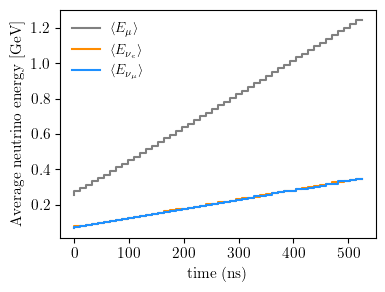

In [13]:
plot_avgE_vs_time(PA_numu, PA_nue)

# Collider lattices

In [5]:
import pickle
with open('beam-optics/ring_v06_smoothed.pkl', 'rb') as f:
    lattice_10TeV_dict = pickle.load(f)
with open('beam-optics/ring_3tev_v1.2_smoothed.pkl', 'rb') as f:
    lattice_3TeV_dict = pickle.load(f)
with open('beam-optics/ring_IR_v09.pkl', 'rb') as f:
    lattice_IR_v09_dict = pickle.load(f)

In [6]:
lattice_10TeV = lt.Lattice(**lattice_10TeV_dict)
lattice_3TeV = lt.Lattice(**lattice_3TeV_dict)
lattice_IR_v09 = lt.Lattice(**lattice_IR_v09_dict)

Setting additional dispersion_Dx to <scipy.interpolate._interpolate.interp1d object at 0x129573520>
Setting additional dispersion_Dpx to <scipy.interpolate._interpolate.interp1d object at 0x129573700>
Warning! The following keys were not recognized and will be ignored: dict_keys(['dispersion_Dx', 'dispersion_Dpx'])
Setting additional dispersion_Dx to <scipy.interpolate._interpolate.interp1d object at 0x129573d90>
Setting additional dispersion_Dpx to <scipy.interpolate._interpolate.interp1d object at 0x129573de0>
Warning! The following keys were not recognized and will be ignored: dict_keys(['dispersion_Dx', 'dispersion_Dpx'])


ValueError: Lattice dictionary must contain beam_p0 key.

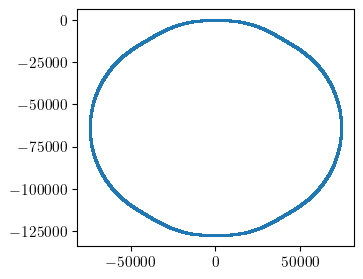

In [41]:
nufact_nue.place_muons_on_lattice(lattice_3TeV)
nufact_numu.place_muons_on_lattice(lattice_3TeV)

plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['x'], marker='.', s=0.5)
plt.gca().set_aspect('equal', adjustable='box')

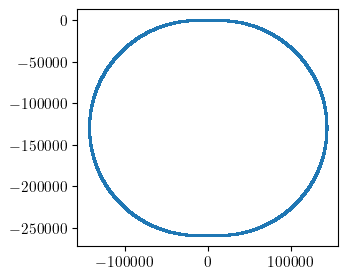

In [8]:
nufact_nue.place_muons_on_lattice(lattice_10TeV)
nufact_numu.place_muons_on_lattice(lattice_10TeV)

plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['x'], marker='.', s=0.5)
# plt.ylim(-10e2, 10e2)
# plt.xlim(-400e2, 400e2)
plt.gca().set_aspect('equal', adjustable='box')

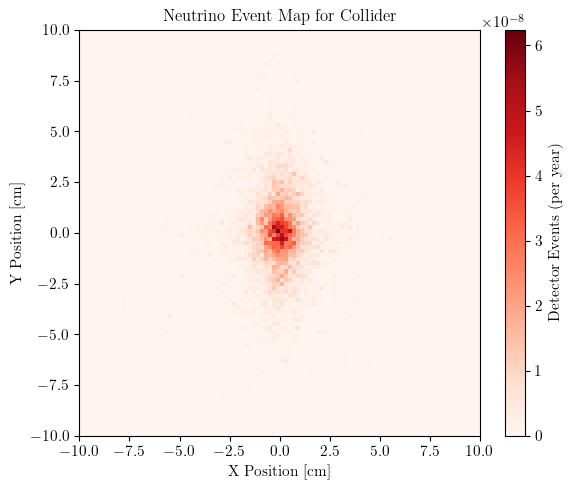

In [ ]:
X, Y, event_map = nufact_numu.get_event_map_fixed_z(
    detect_loc=[(1.5e2/np.tan(6*np.pi/180), 0)], #approximately 14m from the IP, at 6 degrees
    xrange=(-10,10),  
    yrange=(-10, 10),      
    nx=100,
    ny=100,
    det_radius=1.5e2              # 1.5m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map.T, shading='auto', cmap='Reds', vmin=0)
plt.colorbar(c, label='Detector Events (per year)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map for Collider")
plt.tight_layout()
plt.show()

# Practice placing detector for RLA's and PA

In [ ]:
design = {
    "name": r"RLA1",
    "short_name": "rla1",
    "muon_polarization": 0.0,
    }

RLA1_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

RLA1_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

RLA1_numu.decay_muons()
RLA1_nue.decay_muons()


RLA1_lattice = lt.create_RLA_lattice(
            straight_length=70e2,
            n_elements=100_000,
            p0_injection=1.25,
            dp_dx_LA=0.75/70e2,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1e-2,
        )
RLA1_nue.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")
RLA1_numu.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")

max_index = len(RLA1_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(RLA1_lattice.vertices[0], RLA1_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(RLA1_numu.pos['z'], RLA1_numu.pos['y'], marker='.', s=0.25)
ax.scatter(15000, 0, marker='.', s=10)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("RLA 1")

In [ ]:
enu_edges = np.linspace(0, 5, 40)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2

_, flux_numu = RLA1_numu.get_flux_at_generic_location(
        det_location=[0, 0, 150e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue = RLA1_nue.get_flux_at_generic_location(
        det_location=[0, 0, 150e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_far = RLA1_numu.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_far = RLA1_nue.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=150$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges, weights=flux_nue, label=r'$\nu_e$ flux ($L=150$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector (RLA1)")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.8)
ax.set_xlim(0, 5)
fig.savefig('plots/RLA1_flux.pdf', bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_numu = RLA1_numu.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Muon Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/RLA1_flux_numu_w_distance.png', bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_nue = RLA1_nue.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)
        line = ax.hist(enu, bins=enu_edges, weights=flux_nue, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Electron Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/RLA1_flux_nue_w_distance.png', bbox_inches='tight')

# Combine the 3 accelerators

In [9]:
combined_numu = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

combined_nue = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

combined_numu.decay_muons()
combined_nue.decay_muons()

Setting additional z to <scipy.interpolate._interpolate.interp1d object at 0x1424867b0>
Setting additional tangent to <function create_lattice_dict_from_vertices.<locals>.<lambda> at 0x127f5d1c0>
Warning! The following keys were not recognized and will be ignored: dict_keys(['z', 'tangent'])
is same; lattice nmu per bunch is: 2000000000000.0
sample_size: 937842
pos x range: -2744.843487481716 1.1355207394002746 2744.838378085877
pos y range: -2000.0 -1745.5771076445187 0.0
pos z range: -7999.960860165247 4140.65879051793 17168.21029579302
s_in_turn min/max: 0.10092666762333946 139577.05858551728
u_parameter min/max: 7.230883850573023e-07 0.9999988334134864
mutimes min/max: 3.644086665008761e-12 4.656804432359329e-06
muon_lifetime min/max: 5.739539506263359e-06 0.00010523639109495259
sample_size: 937764
pos x range: -2744.8435567164747 0.8315984688177084 2744.838328979228
pos y range: -2000.0 -1745.8436103715255 0.0
pos z range: -7999.960860165247 4152.5189198078315 17168.21029579302
s_

Text(0.5, 1.0, 'PA+RLA1')

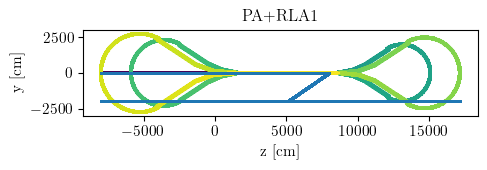

In [22]:
combined_lattice = lt.append_lattices(
            straight_lattice,
            RLA1_lattice,
            -20e2,
            -29.11e2)


combined_nue.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")
combined_numu.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")

max_index = len(combined_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(combined_lattice.vertices[0], combined_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(combined_numu.pos['z'], combined_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title(combined_lattice.name)

Text(0.5, 1.0, 'PA+RLA1')

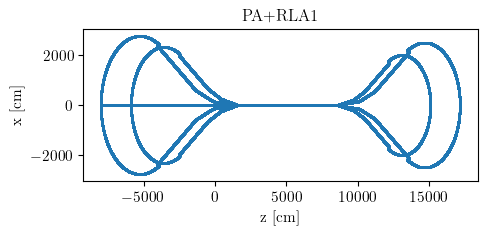

In [15]:
fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(combined_numu.pos['z'], combined_numu.pos['x'], marker='.', s=0.25)
ax.set_xlabel("z [cm]")
ax.set_ylabel("x [cm]")
ax.set_title(combined_lattice.name)

In [9]:
print(sum(combined_numu.weights))

[111442.53912606]


(<Figure size 400x300 with 1 Axes>,
 <Axes: xlabel='time (ns)', ylabel='Average neutrino energy [GeV]'>)

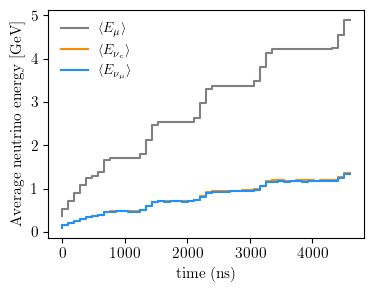

In [14]:
plot_avgE_vs_time(combined_numu, combined_nue)

Setting additional z to <scipy.interpolate._interpolate.interp1d object at 0x1340a0820>
Setting additional tangent to <function create_lattice_dict_from_vertices.<locals>.<lambda> at 0x134099f80>
Warning! The following keys were not recognized and will be ignored: dict_keys(['z', 'tangent'])
is same; lattice nmu per bunch is: 2000000000000.0
Setting additional z to <scipy.interpolate._interpolate.interp1d object at 0x1340d0460>
Setting additional tangent to <function create_lattice_dict_from_vertices.<locals>.<lambda> at 0x134099da0>
Warning! The following keys were not recognized and will be ignored: dict_keys(['z', 'tangent'])
is same; lattice nmu per bunch is: 2000000000000.0
sample_size: 937781
pos x range: -32506.777173090428 18.654640096961845 32506.80352922868
pos y range: -4000.0 -3758.0828195318877 0.0
pos z range: -15000.693615385564 118767.12633183383 283062.36193160596
s_in_turn min/max: 4.2184347912641815 1699698.8379830918
u_parameter min/max: 2.4818715198549057e-06 0.999

Text(0.5, 1.0, 'Combined Accelerators')

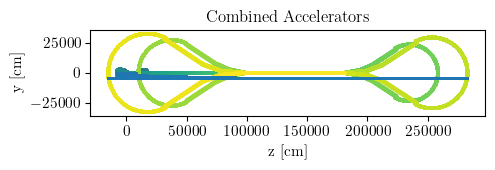

In [10]:
combined_lattice =lt.append_lattices(
    lt.append_lattices(
            straight_lattice,
            RLA1_lattice,
            -20e2,
            -29.11e2),
    RLA2_lattice,
    -20e2,
    1550.1e2-165.89e2
)


combined_nue.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")
combined_numu.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")

max_index = len(combined_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(combined_lattice.vertices[0], combined_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(combined_numu.pos['z'], combined_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("Combined Accelerators")

Text(0.5, 1.0, 'PA+RLA1+RLA2')

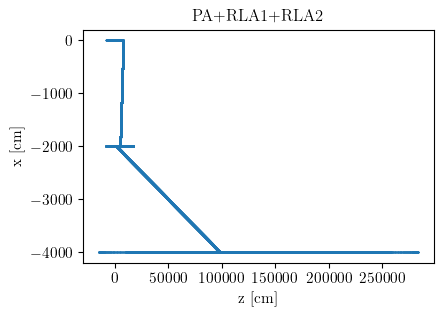

In [14]:
fig, ax = pt.std_fig()
ax.scatter(combined_lattice.vertices[0], combined_lattice.vertices[2], marker='.', s=0.25)
ax.set_xlabel("z [cm]")
ax.set_ylabel("x [cm]")
ax.set_title(combined_lattice.name)

Text(0.5, 1.0, 'PA+RLA1+RLA2')

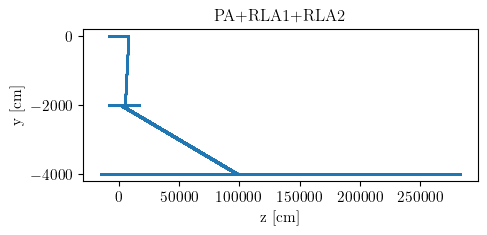

In [15]:
fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(combined_numu.pos['z'], combined_numu.pos['y'], marker='.', s=0.25)
ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title(combined_lattice.name)

In [38]:
print(np.max(combined_lattice.vertices[0]))
print(np.min(combined_lattice.vertices[1]))

283062.36193160596
-76244.83233520949


In [11]:
print(sum(combined_numu.weights))

[2.21641337e+11]


(<Figure size 400x300 with 1 Axes>,
 <Axes: xlabel='time (ns)', ylabel='Average neutrino energy [GeV]'>)

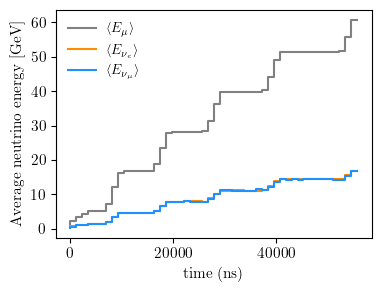

In [13]:
plot_avgE_vs_time(combined_numu, combined_nue)

In [ ]:
enu_edges1 = np.linspace(0, 5, 40)
enu1 = (enu_edges1[1:] + enu_edges1[:-1]) / 2

enu_edges2 = np.linspace(0, 5, 40)
enu2 = (enu_edges2[1:] + enu_edges2[:-1]) / 2

enu_edges3 = np.linspace(0, 63, 40)
enu3 = (enu_edges3[1:] + enu_edges3[:-1]) / 2

_, flux_numu = combined_numu.get_flux_at_generic_location(
        det_location=[0, 0, 50e2],
        det_radius=10e2,
        ebins=enu_edges1,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue = combined_nue.get_flux_at_generic_location(
        det_location=[0, 0, 50e2],
        det_radius=10e2,
        ebins=enu_edges1,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_mid = combined_numu.get_flux_at_generic_location(
        det_location=[0, 0, 200e2],
        det_radius=10e2,
        ebins=enu_edges2,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_mid = RLA1_nue.get_flux_at_generic_location(
        det_location=[0, 0, 200e2],
        det_radius=10e2,
        ebins=enu_edges2,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_far = combined_numu.get_flux_at_generic_location(
        det_location=[0, 0, 1500e2],
        det_radius=10e2,
        ebins=enu_edges3,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_far = RLA1_nue.get_flux_at_generic_location(
        det_location=[0, 0, 1500e2],
        det_radius=10e2,
        ebins=enu_edges3,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu1, bins = enu_edges1, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=50$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu1, bins = enu_edges1, weights=flux_nue, label=r'$\nu_e$ flux ($L=50$~m)', histtype='step', color='darkorange', density=True)

print(flux_numu)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Near Neutrino flux through detector (Combined)")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_xlim(0,5)
fig.savefig('plots/combined_flux.pdf', bbox_inches='tight')


In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges1, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=50$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges1, weights=flux_nue, label=r'$\nu_e$ flux ($L=50$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges2, weights=flux_numu_mid, label=r'$\bar\nu_\mu$ flux ($L=200$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='-')
_=ax.hist(enu, bins = enu_edges2, weights=flux_nue_mid, label=r'$\nu_e$ flux ($L=200$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='-')

_=ax.hist(enu, bins = enu_edges3, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=1500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges3, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=1500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector (Combined)")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.8)
ax.set_xlim(0, 65)
fig.savefig('plots/combined_flux.pdf', bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges1, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=50$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges1, weights=flux_nue, label=r'$\nu_e$ flux ($L=50$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges2, weights=flux_numu_mid, label=r'$\bar\nu_\mu$ flux ($L=200$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='-')
_=ax.hist(enu, bins = enu_edges2, weights=flux_nue_mid, label=r'$\nu_e$ flux ($L=200$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='-')

_=ax.hist(enu, bins = enu_edges3, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=1500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges3, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=1500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector (Combined)")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.8)
ax.set_xlim(0, 65)
fig.savefig('plots/combined_flux.pdf', bbox_inches='tight')

In [19]:
PA_RLA1 = lt.append_lattices(
            straight_lattice,
            RLA1_lattice,
            -37.44e2,
            -29.11e2
)

total: 140787.8934551999
is different; lattice nmu per bunch is: 1000000.0


In [21]:
print(sum(combined_numu.weights[combined_numu.s_muon<=160e2,0]))

print(sum(combined_numu.weights[combined_numu.s_muon<=140787.8934551999,0]))

39439366729.3737
111346210390.88452


In [ ]:
combined_lattice = lt.append_lattices(
        RLA1_lattice,
        RLA2_lattice,
        p0_injection = 5
)


combined_nue.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")
combined_numu.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")

plot_avgE_vs_time(combined_numu, combined_nue)

Test if the u ranges makes sense; 0 to 0.5 and 0.5 to 1

In [ ]:
X, Y, acc_map = combined_numu.get_acceptance_map_fixed_z(
    z_location=293062,           # 100m downstream
    xrange=(-5000,5000),  
    yrange=(-77245, 10e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, acc_map, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Acceptance (Fraction of Neutrinos)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Acceptance Map at z = {293062:.0f} cm")
plt.tight_layout()
plt.show()

In [ ]:
X, Y, acc_map = combined_numu.get_acceptance_map_fixed_z(
    z_location=284062,           # 10m downstream
    xrange=(-5000,5000),  
    yrange=(-77245, 10e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, acc_map, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Acceptance (Fraction of Neutrinos)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Acceptance Map at z = {293062:.0f} cm")
plt.tight_layout()
plt.show()

TESTS BELOW

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mineut
from mineut import plot_tools as pt
from mineut import lattice_tools as lt

from mineut.MuC import MuDecaySimulator


PA_numu = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

PA_nue = MuDecaySimulator(
    muon_polarization = 0.0,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )


In [2]:
straight_lattice = lt.create_straight_lattice(
            total_length=160e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1,
            Nmu_per_bunch=1e6,
        )

PA_numu.decay_muons()
print("total length: ",160e9)
#PA_nue.decay_muons()

PA_numu.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")
#PA_nue.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")

total length:  160000000000.0


In [ ]:
np.mean(PA_numu.pmu['E'])

In [39]:
print(sum(PA_numu.weights))
print(sum(PA_nue.weights))

[42404.33479813]
[42390.87094784]


In [4]:
PA_numu.num_events(
        decay_weights=PA_numu.weights[:, 0]
    )

np.float64(5.38981330980807e-08)

Get event mapping

5.356893286323059e-07
[1.62808667e-03 9.96533344e-04 1.83349854e-03 ... 9.98587208e-01
 1.17710972e+00 2.84366376e-01]
[9.73373990e-15 5.95791154e-15 1.09618230e-14 ... 5.97019085e-12
 7.03751222e-12 1.70012346e-12]
415438
415438


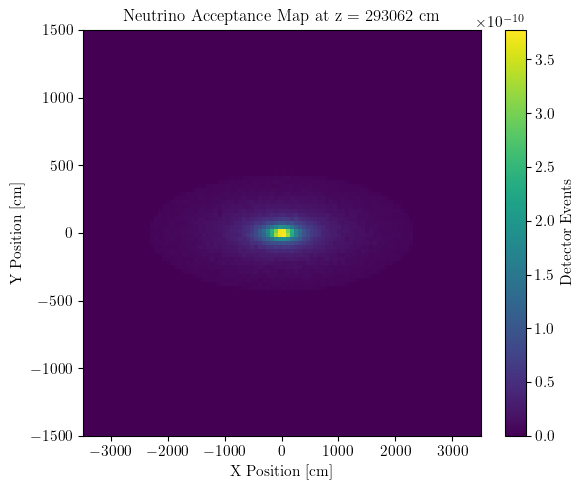

In [24]:
X, Y, event_map = PA_numu.get_event_map_fixed_z(
    z_location=90e2,           # 10m downstream
    xrange=(-3500,3500),  
    yrange=(-15e2, 15e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Acceptance Map at z = {293062:.0f} cm")
plt.tight_layout()
plt.show()

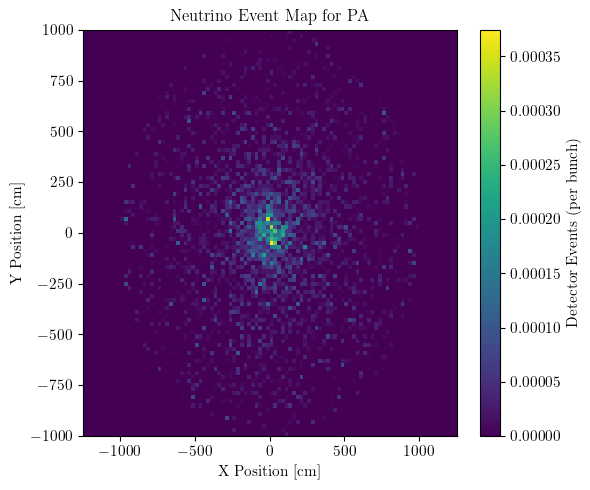

In [14]:
X, Y, event_map = combined_numu.get_event_map_fixed_z(
    detect_loc=[(90e2, 0)],
    xrange=(-1250,1250),  
    yrange=(-10e2, 10e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map.T, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events (per bunch)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map for PA")
plt.tight_layout()
plt.show()

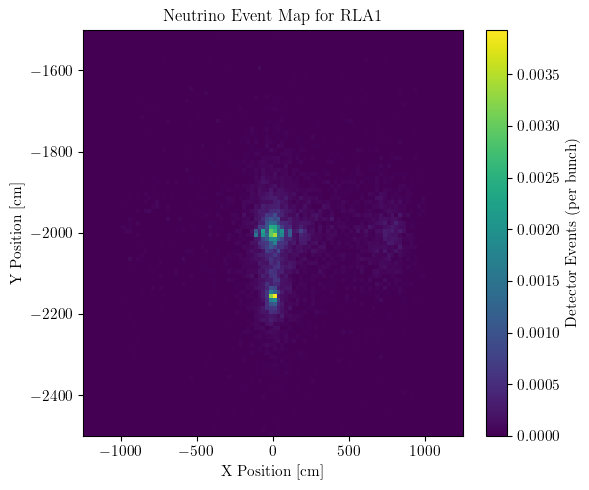

In [23]:
X, Y, event_map = combined_numu.get_event_map_fixed_z(
    detect_loc=[(120.7921e2-29.11e2, 20e2)],
    xrange=(-1250,1250),  
    yrange=(-25e2, -15e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map.T, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events (per bunch)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map for RLA1")
plt.tight_layout()
plt.show()

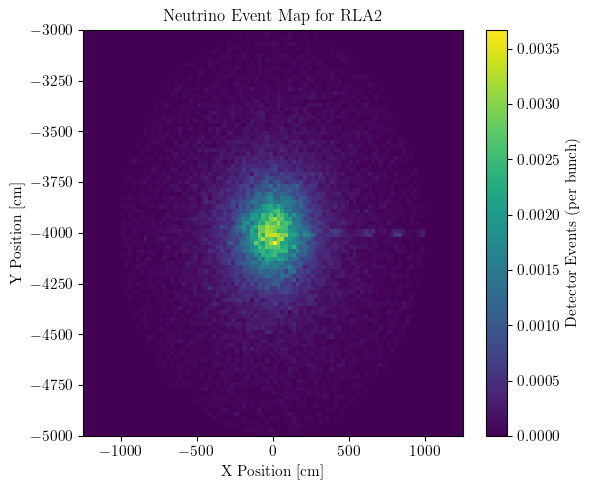

In [22]:
X, Y, event_map = combined_numu.get_event_map_fixed_z(
    detect_loc=[(2830.62e2, 40e2)],
    xrange=(-1250,1250),  
    yrange=(-50e2, -30e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map.T, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events (per bunch)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map for RLA2")
plt.tight_layout()
plt.show()

In [14]:
np.savetxt('event_map.txt',event_map)

In [15]:
event_array = np.loadtxt('event_map.txt')

In [22]:
max_index = np.where(event_array==np.max(event_array))
print(np.max(event_array))
print(max_index)

x_pos = max_index[1][0]
y_pos = max_index[0][0]
print(X[0][x_pos],Y[y_pos][0])

7.637245425728872e-05
(array([42]), array([49]))
-50.50505050505035 -44050.15151515152


Compare with Racetrack Nu Factory

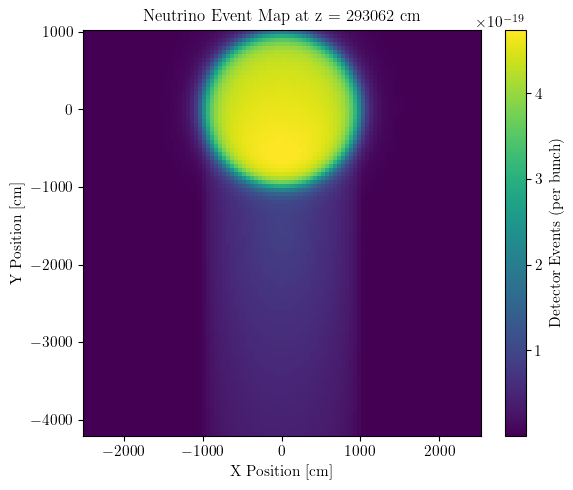

In [32]:
X, Y, nufact_event_map = nufact_numu.get_event_map_fixed_z(
    z_location=7592,           # 10m downstream
    xrange=(-2500,2500),  
    yrange=(-4183, 1000),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, nufact_event_map, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events (per bunch)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map at z = {293062:.0f} cm")
plt.tight_layout()
plt.show()

In [36]:
np.savetxt('nufact_event_map.txt',nufact_event_map)
nufact_event_array = np.loadtxt('nufact_event_map.txt')

In [37]:
nf_max_index = np.where(nufact_event_array==np.max(nufact_event_array))
print(np.max(nufact_event_array))
print(nf_max_index)

nf_x_pos = nf_max_index[1][0]
nf_y_pos = nf_max_index[0][0]
print(X[0][nf_x_pos],Y[nf_y_pos][0])

4.742854935489355e-19
(array([69]), array([49]))
-25.252525252525174 -570.6060606060605
